In [8]:

# Task 3: Data Visualisation (CodeAlpha Internship)


# Data Exploration and Cleaning

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('/content/electric_vehicles_spec_2025.csv.csv')

# Initial exploration
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Clean the data (example for one column)
df['range_km'] = pd.to_numeric(df['range_km'], errors='coerce')
df['battery_capacity_kWh'] = pd.to_numeric(df['battery_capacity_kWh'], errors='coerce')

# Drop rows with critical missing values if needed
df = df.dropna(subset=['range_km', 'battery_capacity_kWh'])

    brand                model  top_speed_kmh  battery_capacity_kWh  \
0  Abarth     500e Convertible            155                  37.8   
1  Abarth       500e Hatchback            155                  37.8   
2  Abarth  600e Scorpionissima            200                  50.8   
3  Abarth         600e Turismo            200                  50.8   
4  Aiways                   U5            150                  60.0   

  battery_type  number_of_cells  torque_nm  efficiency_wh_per_km  range_km  \
0  Lithium-ion            192.0      235.0                   156       225   
1  Lithium-ion            192.0      235.0                   149       225   
2  Lithium-ion            102.0      345.0                   158       280   
3  Lithium-ion            102.0      345.0                   158       280   
4  Lithium-ion              NaN      310.0                   156       315   

   acceleration_0_100_s  ...  towing_capacity_kg cargo_volume_l  seats  \
0                   7.0  ...  

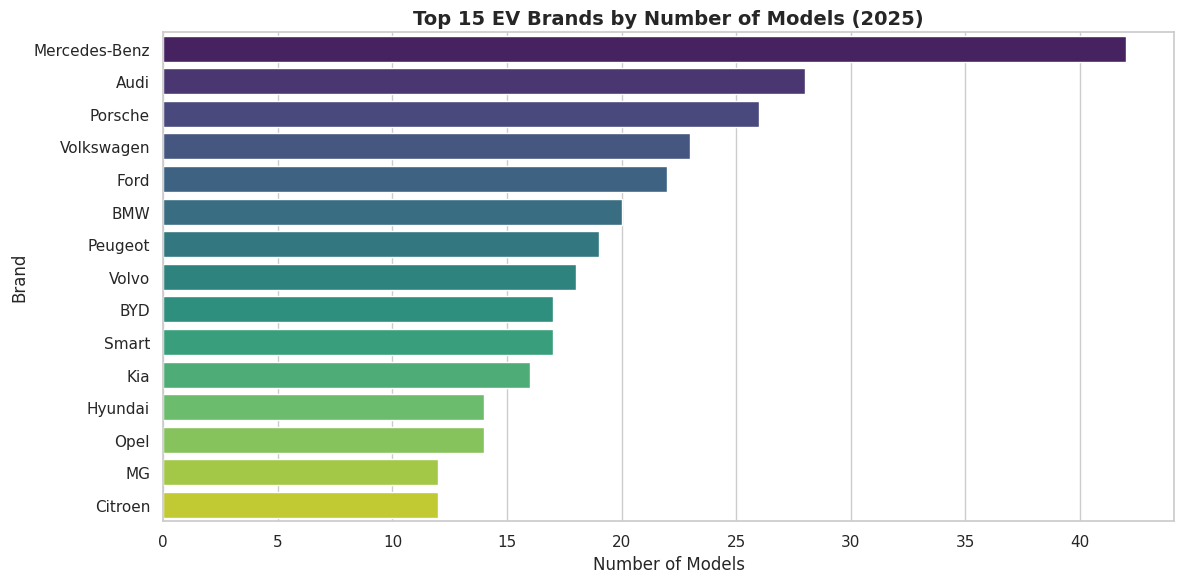

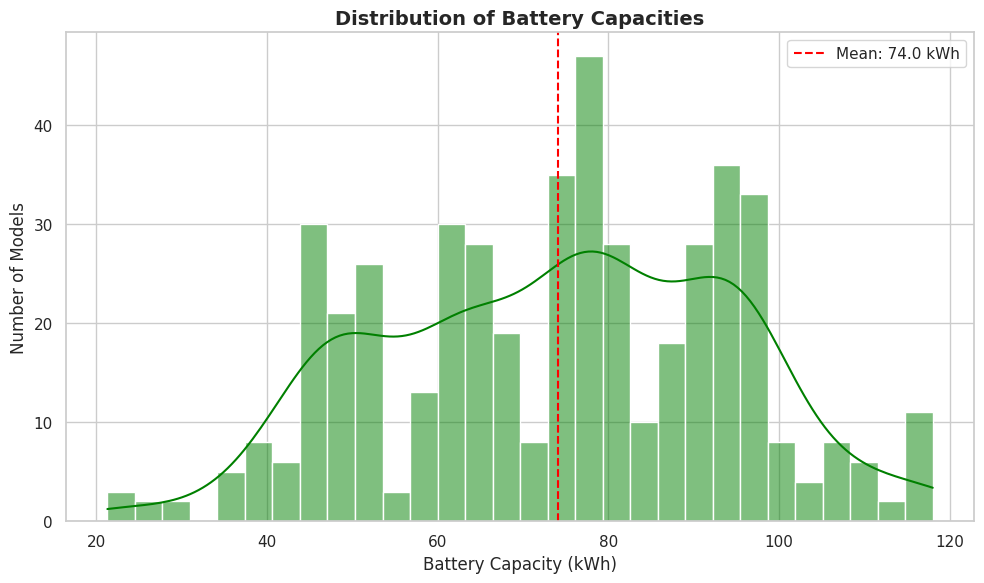

In [29]:

# Basic Visualizations




# Brand Distribution

plt.figure(figsize=(12, 6))
brand_df = df['brand'].value_counts().head(15).reset_index(name='count')
brand_df.columns = ['brand', 'count']  # Ensure proper naming

sns.barplot(data=brand_df, x='count', y='brand', hue='brand',
            dodge=False, legend=False, palette='viridis')

plt.title('Top 15 EV Brands by Number of Models (2025)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Models')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

# Battery Capacity Distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['battery_capacity_kWh'], bins=30, kde=True, color='green')
plt.title('Distribution of Battery Capacities', fontsize=14, fontweight='bold')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Number of Models')
plt.axvline(df['battery_capacity_kWh'].mean(), color='red', linestyle='--',
            label=f'Mean: {df["battery_capacity_kWh"].mean():.1f} kWh')
plt.legend()
plt.tight_layout()
plt.show()





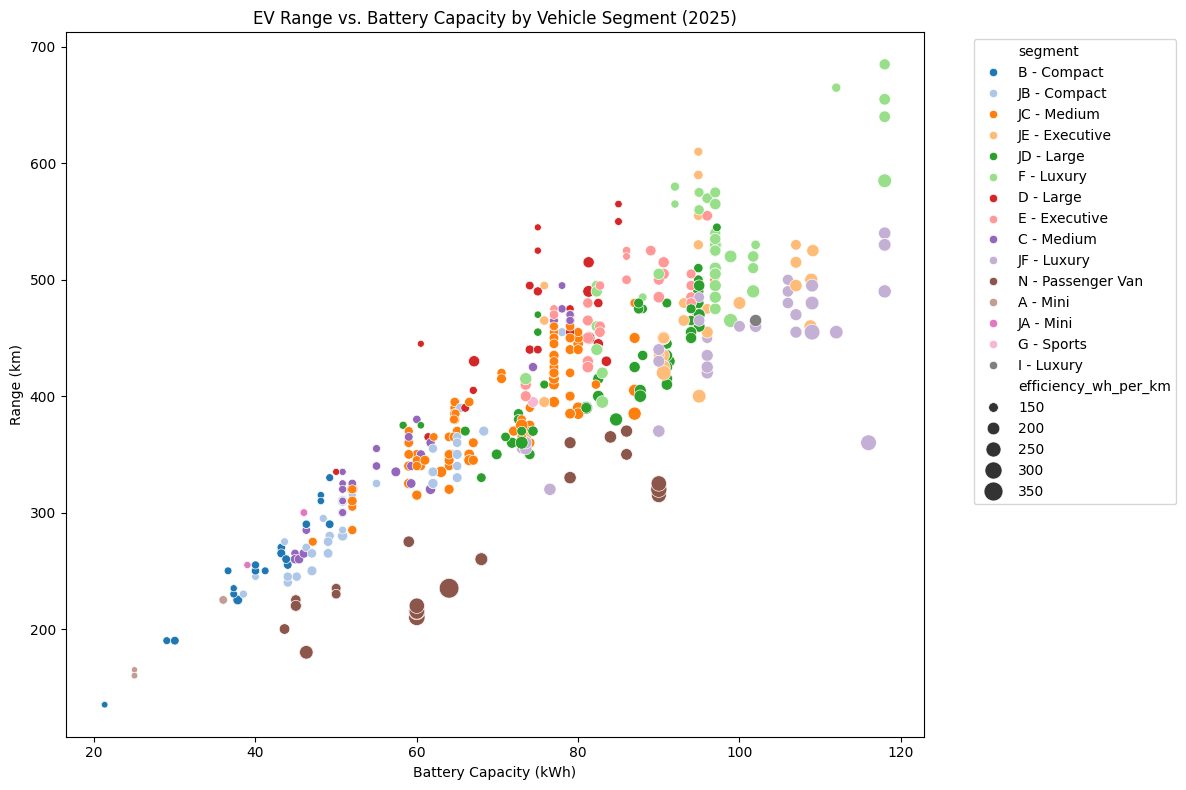

/tmp/ipython-input-9-1177558274.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_segment', y='acceleration_0_100_s', palette='coolwarm')


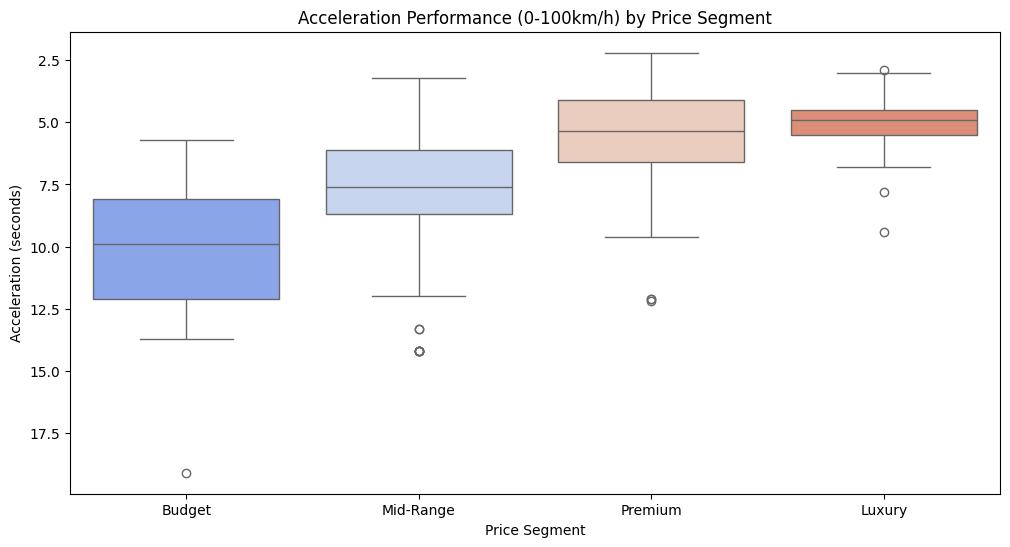

In [9]:
# Advanced Visualizations

# Range vs.Battery Capacity by Segment

plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='battery_capacity_kWh', y='range_km', hue='segment',
palette='tab20', size='efficiency_wh_per_km', sizes=(20, 200))

plt.title('EV Range vs. Battery Capacity by Vehicle Segment (2025)')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (km)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Acceleration Performance by Price Segment

# Create price segments based on battery capacity (proxy for price)


df['price_segment'] = pd.cut(df['battery_capacity_kWh'],
bins=[0, 50, 75, 100, 200],
labels=['Budget', 'Mid-Range', 'Premium', 'Luxury'])

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price_segment', y='acceleration_0_100_s', palette='coolwarm')
plt.title('Acceleration Performance (0-100km/h) by Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Acceleration (seconds)')
plt.gca().invert_yaxis()  # Faster acceleration at top
plt.show()

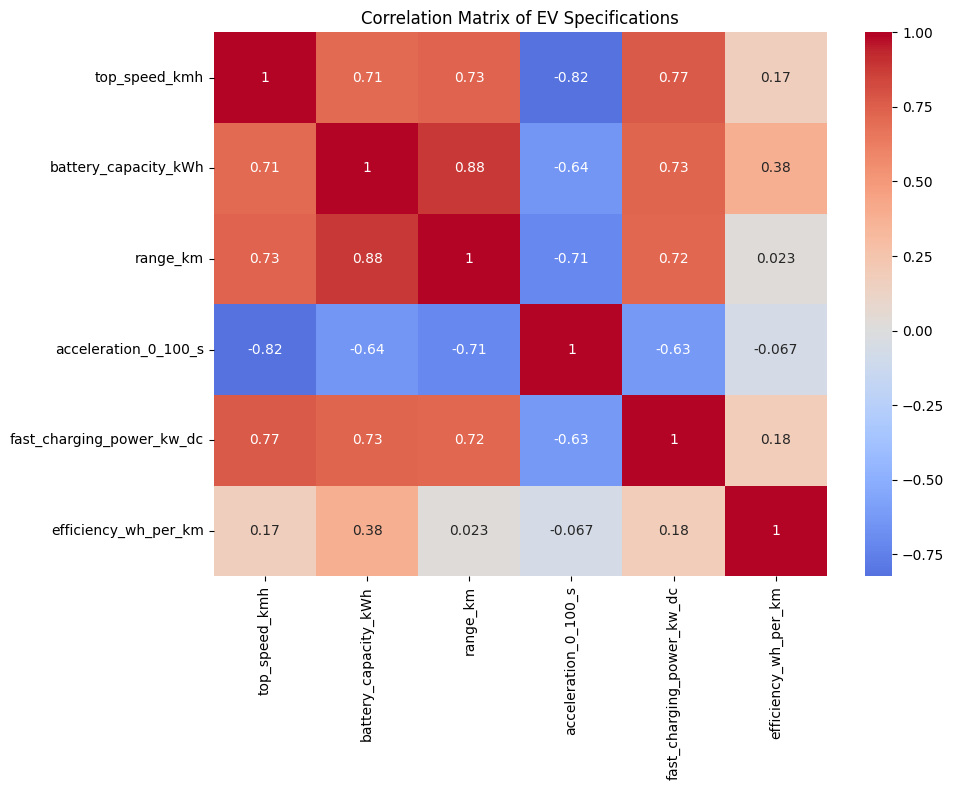

In [10]:

#Correlation Analysis

# Select numerical columns for correlation
numerical_cols = ['top_speed_kmh', 'battery_capacity_kWh', 'range_km',
                 'acceleration_0_100_s', 'fast_charging_power_kw_dc', 'efficiency_wh_per_km']

corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of EV Specifications')
plt.tight_layout()
plt.show()

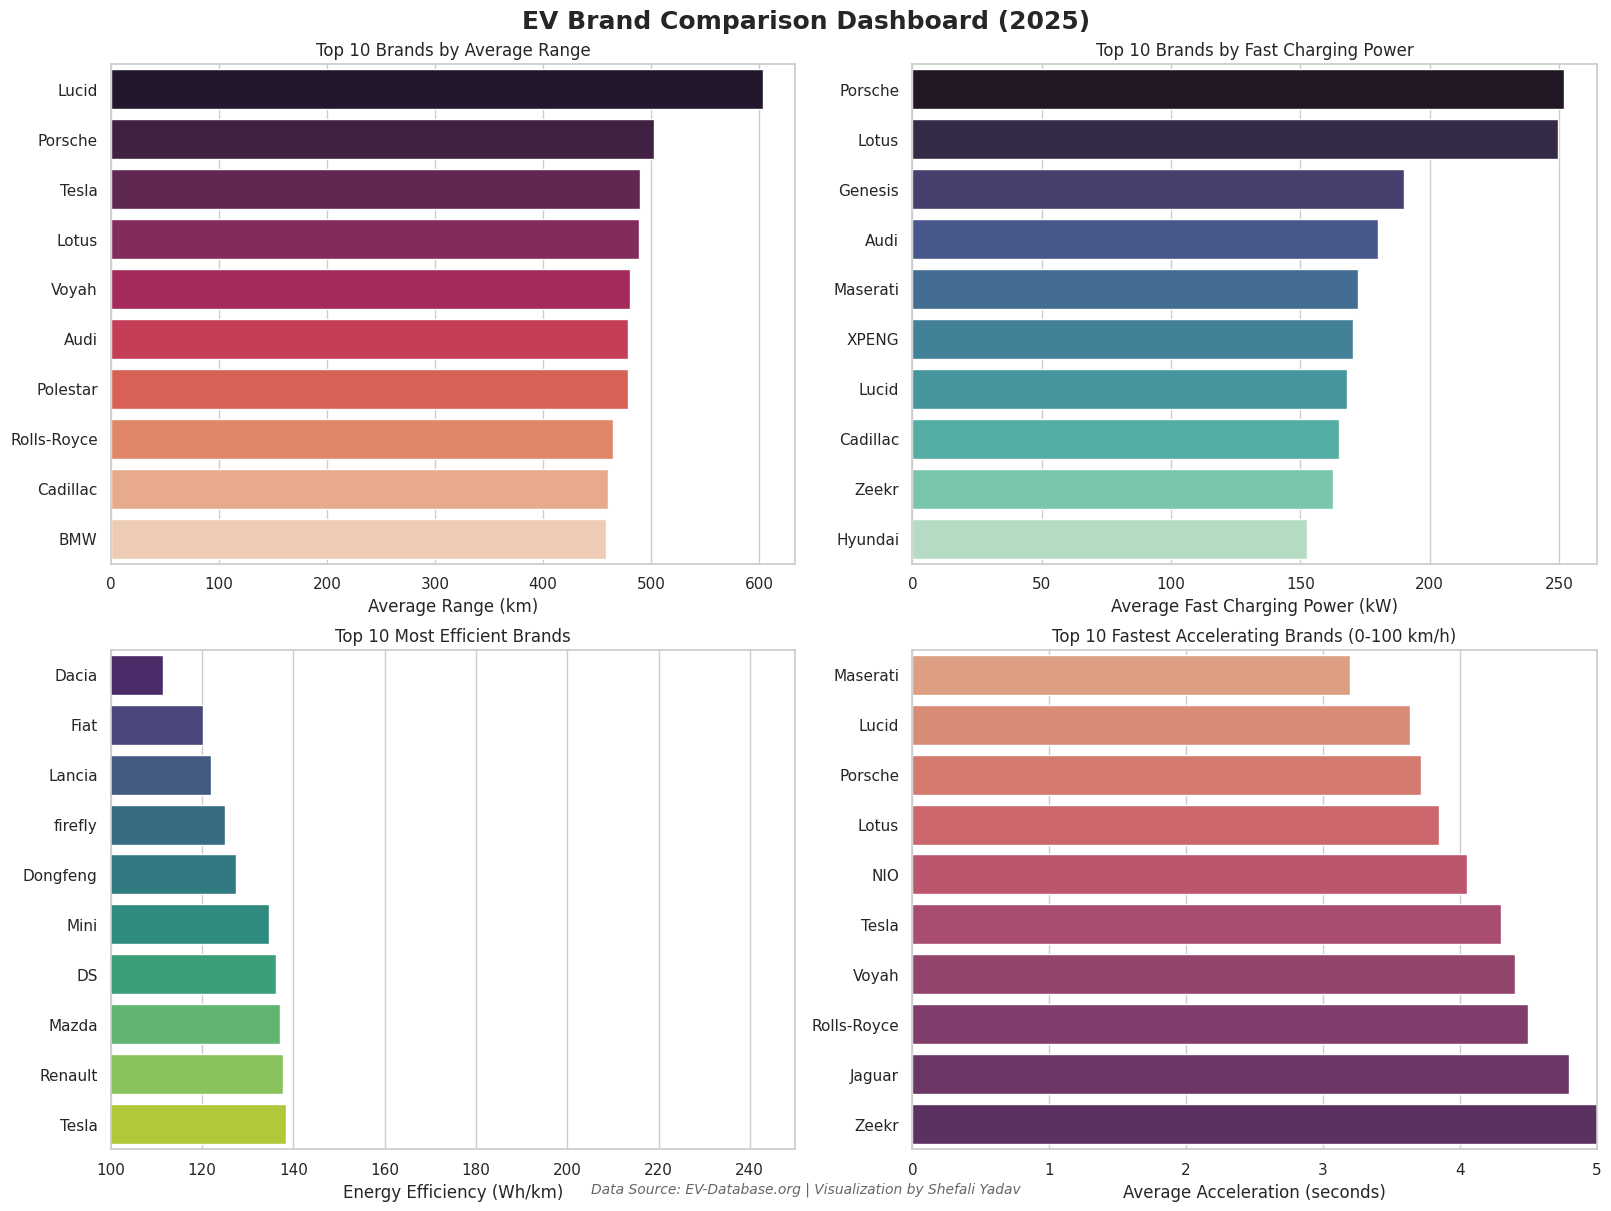

In [27]:

# Brand Comparison Dashboard


df = pd.read_csv("/content/electric_vehicles_spec_2025.csv.csv")

# Set up dashboard layout
fig, axes = plt.subplots(2, 2, figsize=(16, 12), constrained_layout=True)
fig.suptitle('EV Brand Comparison Dashboard (2025)', fontsize=18, fontweight='bold')

# --- Plot 1: Top brands by average range ---
top_brands = df.groupby('brand')['range_km'].mean().sort_values(ascending=False).head(10)
top_range_df = top_brands.reset_index().rename(columns={'range_km': 'value'})
sns.barplot(data=top_range_df, x='value', y='brand', hue='brand', dodge=False, legend=False, palette='rocket', ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Brands by Average Range')
axes[0, 0].set_xlabel('Average Range (km)')
axes[0, 0].set_ylabel('')

# --- Plot 2: Top brands by charging power ---
charging_power = df.groupby('brand')['fast_charging_power_kw_dc'].mean().sort_values(ascending=False).head(10)
top_charge_df = charging_power.reset_index().rename(columns={'fast_charging_power_kw_dc': 'value'})
sns.barplot(data=top_charge_df, x='value', y='brand', hue='brand', dodge=False, legend=False, palette='mako', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Brands by Fast Charging Power')
axes[0, 1].set_xlabel('Average Fast Charging Power (kW)')
axes[0, 1].set_ylabel('')

# --- Plot 3: Most efficient brands ---
efficiency = df.groupby('brand')['efficiency_wh_per_km'].mean().sort_values().head(10)
eff_df = efficiency.reset_index().rename(columns={'efficiency_wh_per_km': 'value'})
sns.barplot(data=eff_df, x='value', y='brand', hue='brand', dodge=False, legend=False, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Most Efficient Brands')
axes[1, 0].set_xlabel('Energy Efficiency (Wh/km)')
axes[1, 0].set_ylabel('')
axes[1, 0].set_xlim(100, 250)

# --- Plot 4: Fastest accelerating brands ---
acceleration = df.groupby('brand')['acceleration_0_100_s'].mean().sort_values().head(10)
accel_df = acceleration.reset_index().rename(columns={'acceleration_0_100_s': 'value'})
sns.barplot(data=accel_df, x='value', y='brand', hue='brand', dodge=False, legend=False, palette='flare', ax=axes[1, 1])
axes[1, 1].set_title('Top 10 Fastest Accelerating Brands (0-100 km/h)')
axes[1, 1].set_xlabel('Average Acceleration (seconds)')
axes[1, 1].set_ylabel('')
axes[1, 1].set_xlim(0, 5)

# Footer note
fig.text(0.5, 0.01, "Data Source: EV-Database.org | Visualization by Shefali Yadav",
         ha="center", fontsize=10, alpha=0.7, style='italic')

plt.show()


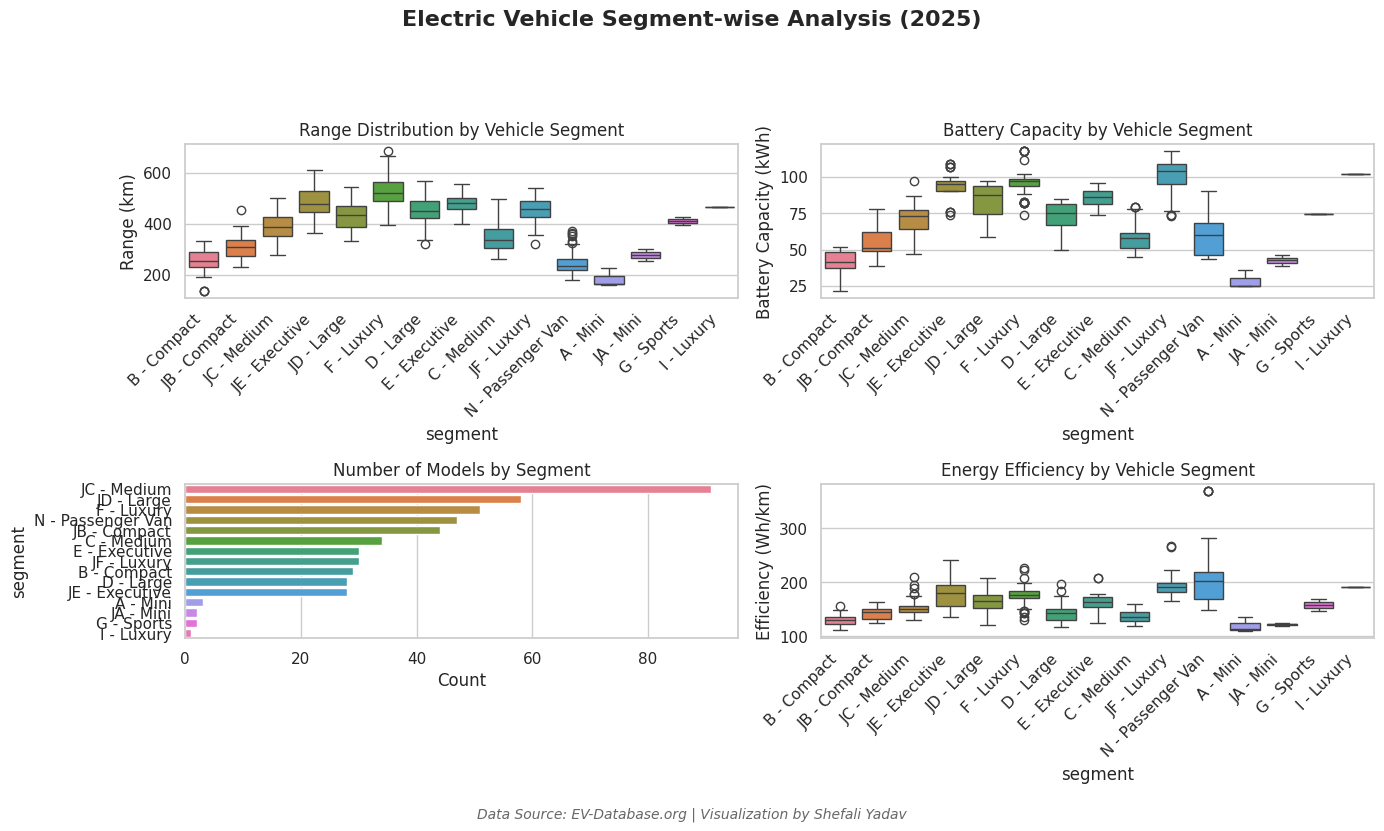

In [25]:

# Segment Analysis

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df = pd.read_csv("/content/electric_vehicles_spec_2025.csv.csv")

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Create a custom color palette
segment_unique = df['segment'].dropna().unique()
palette = sns.color_palette("husl", len(segment_unique))

# Plot 1: Range by segment
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='segment', y='range_km', hue='segment', palette=palette, legend=False)
plt.title('Range Distribution by Vehicle Segment')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Range (km)')

# Plot 2: Battery capacity by segment
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='segment', y='battery_capacity_kWh', hue='segment', palette=palette, legend=False)
plt.title('Battery Capacity by Vehicle Segment')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Battery Capacity (kWh)')

# Plot 3: Price segment distribution
plt.subplot(2, 2, 3)
segment_counts = df['segment'].value_counts()
sns.barplot(x=segment_counts.values, y=segment_counts.index,
            hue=segment_counts.index, palette=palette, dodge=False, legend=False)
plt.title('Number of Models by Segment')
plt.xlabel('Count')

# Plot 4: Efficiency by segment
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='segment', y='efficiency_wh_per_km', hue='segment', palette=palette, legend=False)
plt.title('Energy Efficiency by Vehicle Segment')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Efficiency (Wh/km)')

plt.suptitle("Electric Vehicle Segment-wise Analysis (2025)", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.figtext(0.5, 0.01, "Data Source: EV-Database.org | Visualization by Shefali Yadav",
            ha="center", fontsize=10, alpha=0.7, style='italic')
plt.show()


In [30]:





# Drop rows with missing values in relevant columns to avoid Plotly errors
scatter_cols = ['battery_capacity_kWh', 'range_km', 'segment',
                'fast_charging_power_kw_dc', 'brand', 'model']
parallel_cols = ['range_km', 'battery_capacity_kWh',
                 'acceleration_0_100_s', 'efficiency_wh_per_km', 'top_speed_kmh']

df_scatter = df.dropna(subset=scatter_cols)
df_parallel = df.dropna(subset=parallel_cols)

# Scatter Plot
fig1 = px.scatter(
    df_scatter,
    x='battery_capacity_kWh',
    y='range_km',
    color='segment',
    size='fast_charging_power_kw_dc',
    hover_data=['brand', 'model'],
    title='EV Range vs Battery Capacity with Charging Power (2025)'
)
fig1.update_layout(height=600)
fig1.show()

# Parallel Coordinates Plot
fig2 = px.parallel_coordinates(
    df_parallel,
    dimensions=['range_km', 'battery_capacity_kWh', 'acceleration_0_100_s', 'efficiency_wh_per_km'],
    color='top_speed_kmh',
    title='Parallel Coordinates of EV Specifications'
)
fig2.show()


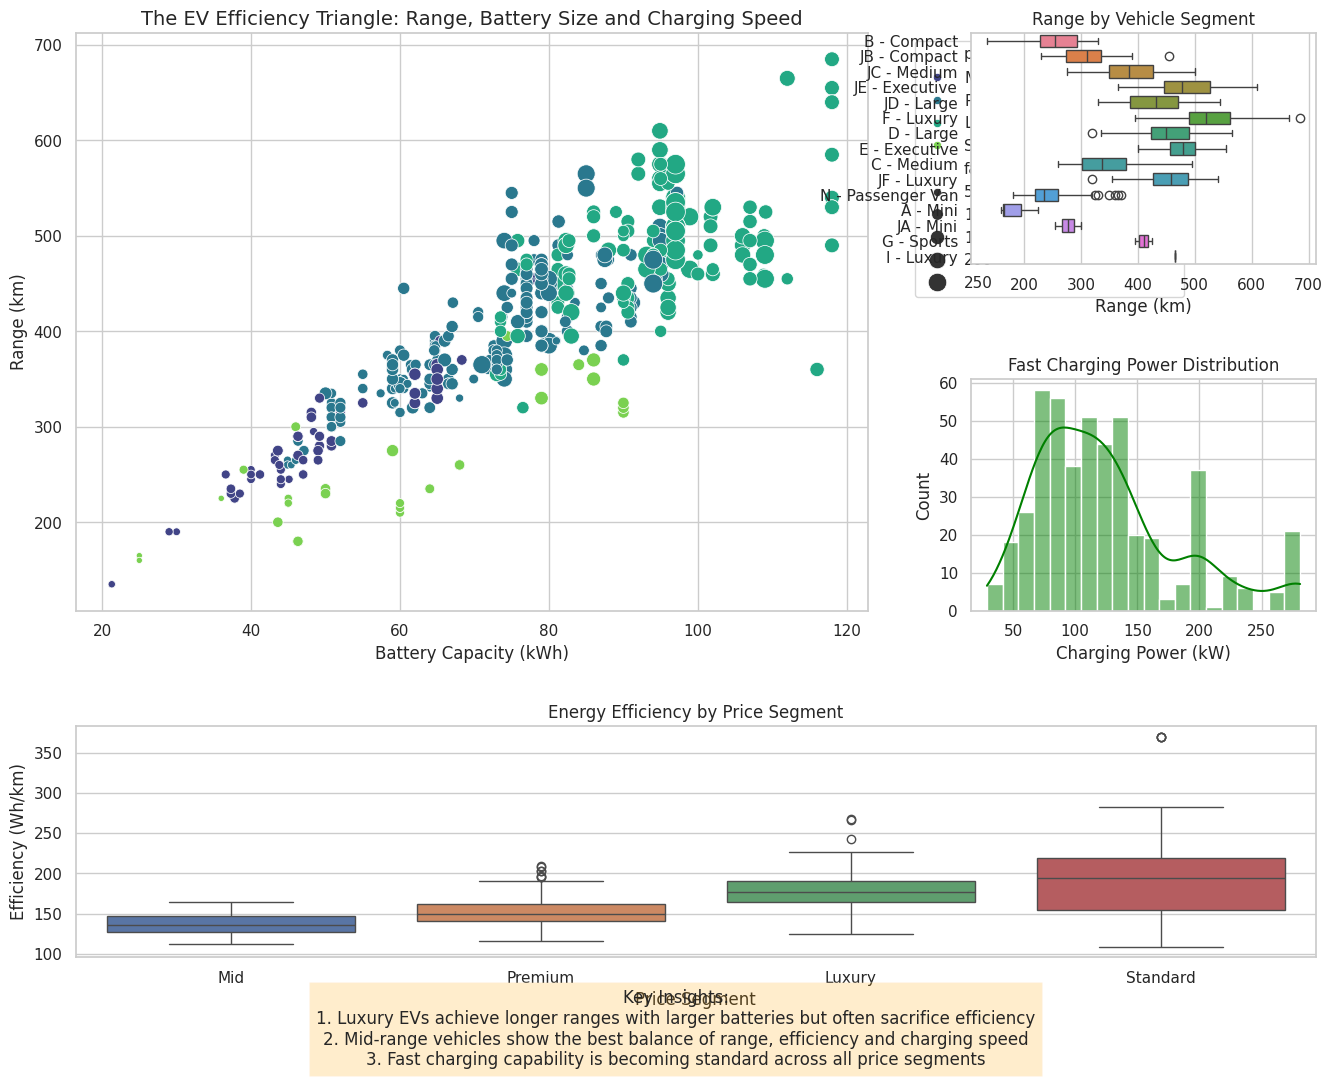

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/electric_vehicles_spec_2025.csv.csv")

# Create a dummy 'price_segment' based on 'segment'
def map_segment_to_price(seg):
    if pd.isna(seg):
        return 'Unknown'
    elif 'Luxury' in seg or 'Executive' in seg:
        return 'Luxury'
    elif 'Compact' in seg:
        return 'Mid'
    elif 'Medium' in seg or 'Large' in seg:
        return 'Premium'
    else:
        return 'Standard'

df['price_segment'] = df['segment'].apply(map_segment_to_price)

# Clean dataset for plotting
df_clean = df.dropna(subset=[
    'battery_capacity_kWh', 'range_km', 'fast_charging_power_kw_dc',
    'efficiency_wh_per_km', 'segment', 'price_segment'
])

# Set style
sns.set(style='whitegrid')

# Create figure layout without tight_layout
fig = plt.figure(figsize=(16, 12))
grid = plt.GridSpec(3, 3, hspace=0.5, wspace=0.3)

# 1. Main Scatter Plot
ax1 = fig.add_subplot(grid[:2, :2])
sns.scatterplot(
    data=df_clean, x='battery_capacity_kWh', y='range_km',
    hue='price_segment', size='fast_charging_power_kw_dc',
    sizes=(20, 200), palette='viridis', ax=ax1
)
ax1.set_title('The EV Efficiency Triangle: Range, Battery Size and Charging Speed', fontsize=14)
ax1.set_xlabel('Battery Capacity (kWh)')
ax1.set_ylabel('Range (km)')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. Range Distribution by Segment
ax2 = fig.add_subplot(grid[0, 2])
sns.boxplot(
    data=df_clean, y='segment', x='range_km',
    hue='segment', dodge=False, legend=False, ax=ax2
)
ax2.set_title('Range by Vehicle Segment')
ax2.set_ylabel('')
ax2.set_xlabel('Range (km)')

# 3. Charging Speed Distribution
ax3 = fig.add_subplot(grid[1, 2])
sns.histplot(
    data=df_clean, x='fast_charging_power_kw_dc',
    bins=20, kde=True, color='green', ax=ax3
)
ax3.set_title('Fast Charging Power Distribution')
ax3.set_xlabel('Charging Power (kW)')

# 4. Efficiency vs Price Segment
ax4 = fig.add_subplot(grid[2, :])
sns.boxplot(
    data=df_clean, x='price_segment', y='efficiency_wh_per_km',
    hue='price_segment', dodge=False, legend=False, ax=ax4
)
ax4.set_title('Energy Efficiency by Price Segment')
ax4.set_xlabel('Price Segment')
ax4.set_ylabel('Efficiency (Wh/km)')

# Add annotation
fig.text(0.5, 0.02,
         "Key Insights:\n"
         "1. Luxury EVs achieve longer ranges with larger batteries but often sacrifice efficiency\n"
         "2. Mid-range vehicles show the best balance of range, efficiency and charging speed\n"
         "3. Fast charging capability is becoming standard across all price segments",
         ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

plt.show()


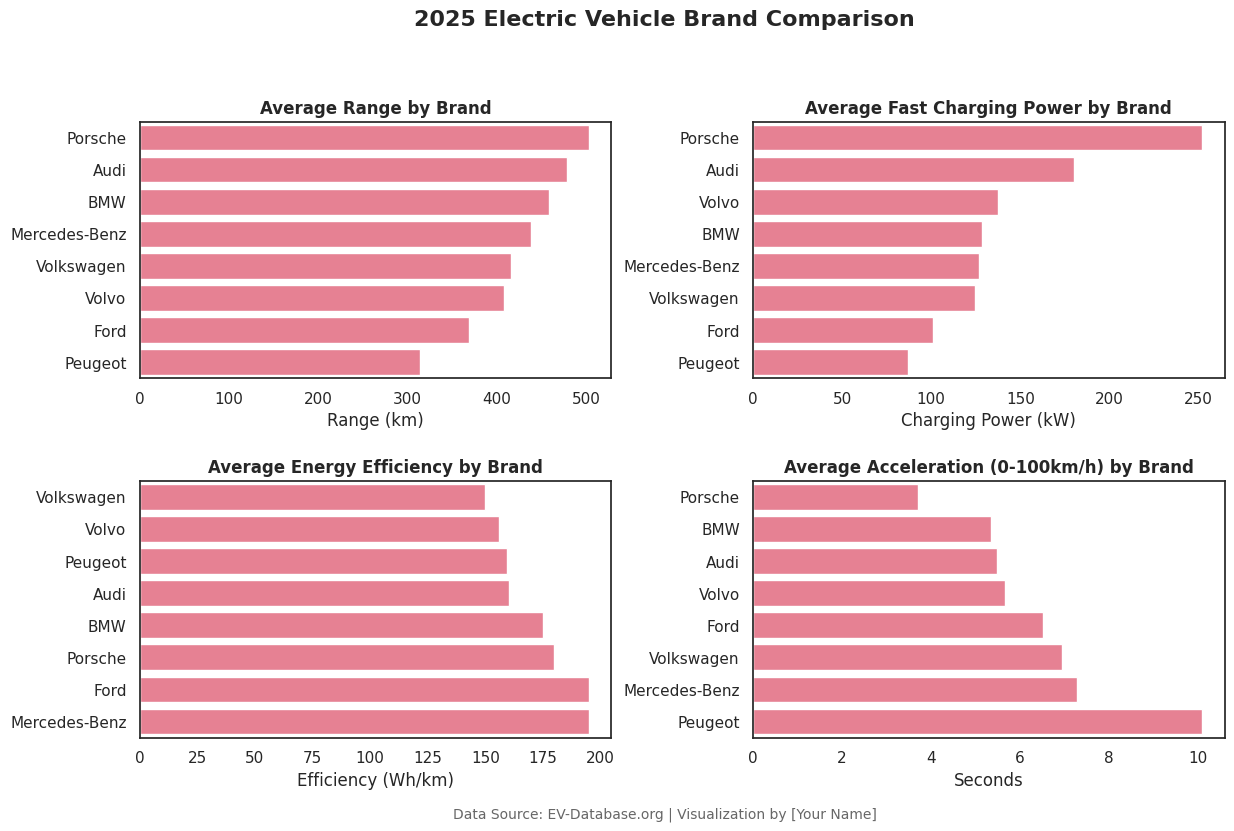

In [21]:
# Select top brands with most models
top_brands = df['brand'].value_counts().nlargest(8).index.tolist()
brand_df = df[df['brand'].isin(top_brands)]

plt.figure(figsize=(14,8))
sns.set_style("white")
sns.set_palette("husl")

# Create a grid of plots
grid = plt.GridSpec(2, 2, hspace=0.4, wspace=0.3)

# Plot 1: Average range
ax1 = plt.subplot(grid[0, 0])
range_means = brand_df.groupby('brand')['range_km'].mean().sort_values(ascending=False)
sns.barplot(x=range_means.values, y=range_means.index, ax=ax1)
ax1.set_title('Average Range by Brand', fontweight='bold')
ax1.set_xlabel('Range (km)')
ax1.set_ylabel('')

# Plot 2: Average charging speed
ax2 = plt.subplot(grid[0, 1])
charge_means = brand_df.groupby('brand')['fast_charging_power_kw_dc'].mean().sort_values(ascending=False)
sns.barplot(x=charge_means.values, y=charge_means.index, ax=ax2)
ax2.set_title('Average Fast Charging Power by Brand', fontweight='bold')
ax2.set_xlabel('Charging Power (kW)')
ax2.set_ylabel('')

# Plot 3: Average efficiency
ax3 = plt.subplot(grid[1, 0])
eff_means = brand_df.groupby('brand')['efficiency_wh_per_km'].mean().sort_values()
sns.barplot(x=eff_means.values, y=eff_means.index, ax=ax3)
ax3.set_title('Average Energy Efficiency by Brand', fontweight='bold')
ax3.set_xlabel('Efficiency (Wh/km)')
ax3.set_ylabel('')

# Plot 4: Average acceleration
ax4 = plt.subplot(grid[1, 1])
accel_means = brand_df.groupby('brand')['acceleration_0_100_s'].mean().nsmallest(10)
sns.barplot(x=accel_means.values, y=accel_means.index, ax=ax4)
ax4.set_title('Average Acceleration (0-100km/h) by Brand', fontweight='bold')
ax4.set_xlabel('Seconds')
ax4.set_ylabel('')

plt.suptitle('2025 Electric Vehicle Brand Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

# Add watermark
plt.figtext(0.5, 0.01, "Data Source: EV-Database.org | Visualization by [Your Name]",
            ha="center", fontsize=10, alpha=0.7)

plt.show()

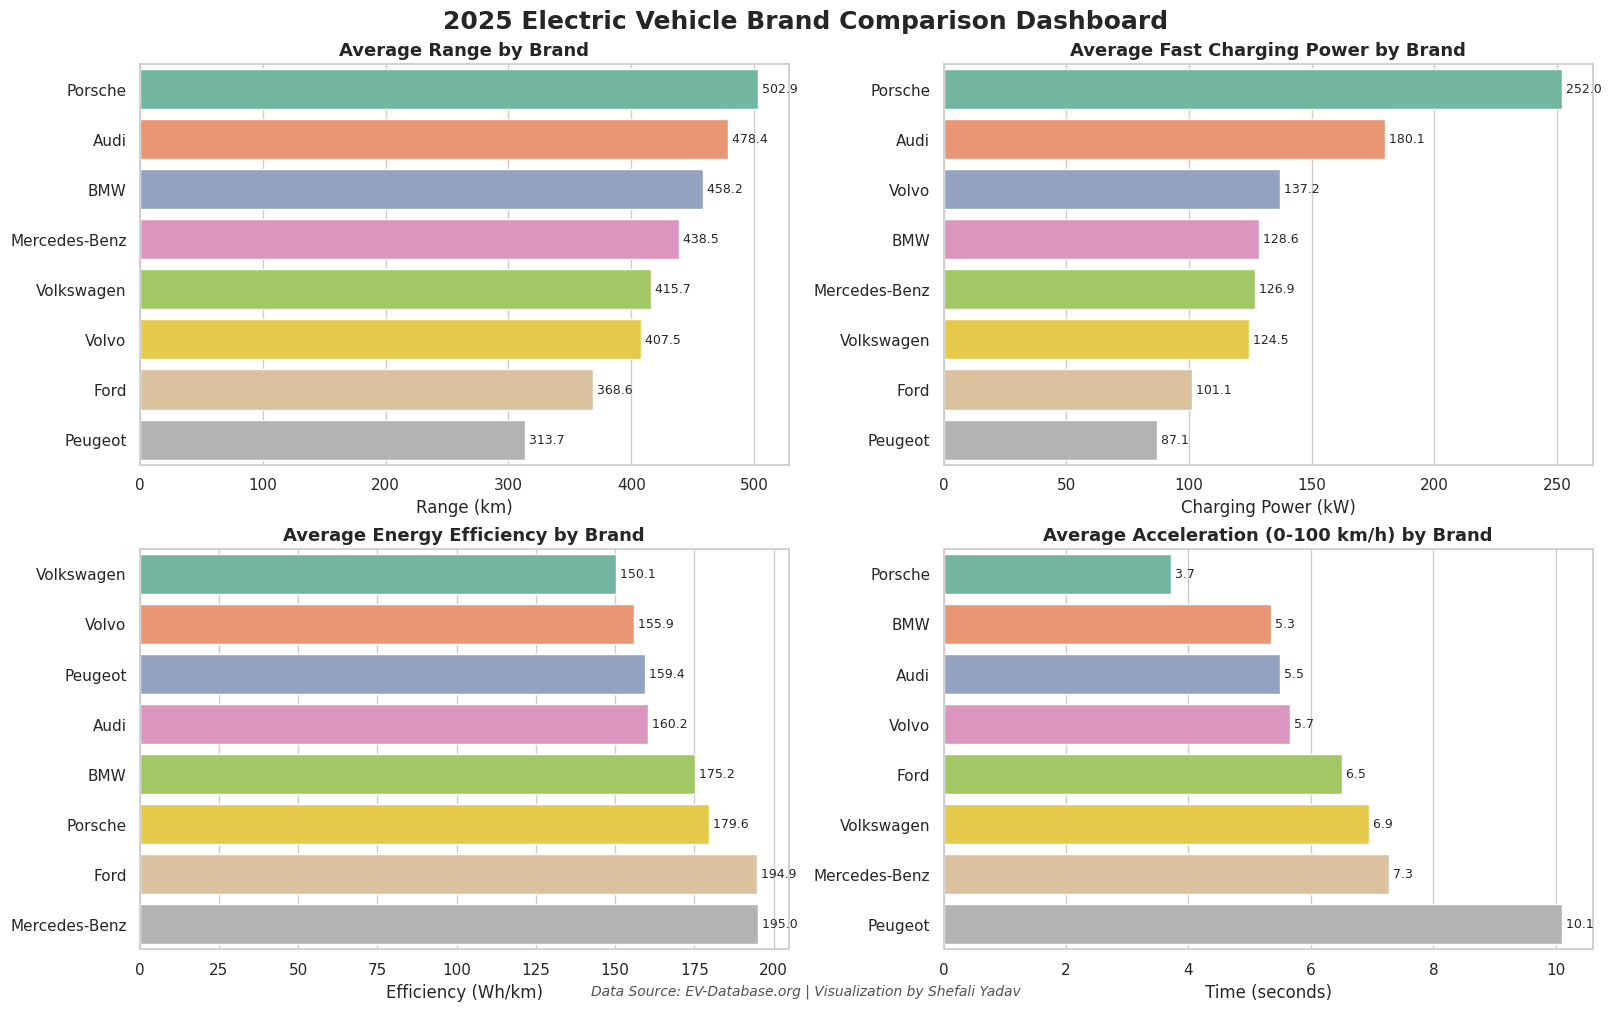

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/electric_vehicles_spec_2025.csv.csv")

# Select top brands with most models
top_brands = df['brand'].value_counts().nlargest(8).index.tolist()
brand_df = df[df['brand'].isin(top_brands)].dropna(
    subset=['range_km', 'fast_charging_power_kw_dc', 'efficiency_wh_per_km', 'acceleration_0_100_s']
).copy()

# Create figure with constrained layout to avoid warnings
fig = plt.figure(figsize=(16, 10), constrained_layout=True)
sns.set_style("whitegrid")
palette = sns.color_palette("Set2", len(top_brands))
grid = fig.add_gridspec(2, 2)

def draw_barplot(ax, values, title, xlabel, color_palette, fmt="{:.1f}"):
    sns.barplot(
        x=values.values,
        y=values.index,
        hue=values.index,
        dodge=False,
        legend=False,
        palette=color_palette,
        ax=ax
    )
    ax.set_title(title, fontweight='bold', fontsize=13)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('')
    for i, (value, y) in enumerate(zip(values.values, values.index)):
        ax.text(value, i, f" {fmt.format(value)}", va='center', fontsize=9)

# Plot 1: Average range
ax1 = fig.add_subplot(grid[0, 0])
range_means = brand_df.groupby('brand')['range_km'].mean().sort_values(ascending=False)
draw_barplot(ax1, range_means, 'Average Range by Brand', 'Range (km)', palette)

# Plot 2: Average charging speed
ax2 = fig.add_subplot(grid[0, 1])
charge_means = brand_df.groupby('brand')['fast_charging_power_kw_dc'].mean().sort_values(ascending=False)
draw_barplot(ax2, charge_means, 'Average Fast Charging Power by Brand', 'Charging Power (kW)', palette)

# Plot 3: Average efficiency
ax3 = fig.add_subplot(grid[1, 0])
eff_means = brand_df.groupby('brand')['efficiency_wh_per_km'].mean().sort_values()
draw_barplot(ax3, eff_means, 'Average Energy Efficiency by Brand', 'Efficiency (Wh/km)', palette)

# Plot 4: Average acceleration
ax4 = fig.add_subplot(grid[1, 1])
accel_means = brand_df.groupby('brand')['acceleration_0_100_s'].mean().sort_values()
draw_barplot(ax4, accel_means, 'Average Acceleration (0-100 km/h) by Brand', 'Time (seconds)', palette)

# Title and footer (compatible with constrained_layout)
fig.suptitle('2025 Electric Vehicle Brand Comparison Dashboard', fontsize=18, fontweight='bold')
fig.text(0.5, 0.01, "Data Source: EV-Database.org | Visualization by Shefali Yadav",
         ha="center", fontsize=10, alpha=0.8, style='italic')

plt.show()
